In [7]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gzip
import numpy as np
from src.data.websites import website as website_helper

%load_ext autoreload
%autoreload 2
import src

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Pie Chart of HTTP  Status Codes

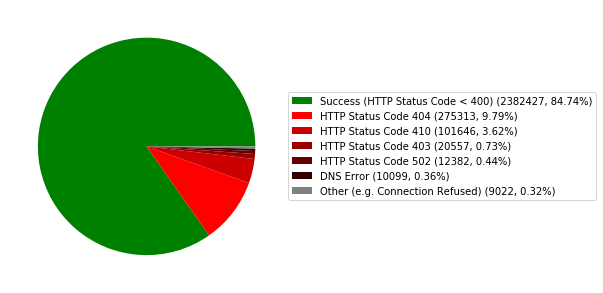

In [8]:
# SELECT left(crawling_status, 3) ,count(1) from articles group by left(crawling_status, 3) order by count(1) desc
data = [("Success (HTTP Status Code < 400)",2382427),
        ("HTTP Status Code 404",275313),
        ("HTTP Status Code 410",101646),
        ("HTTP Status Code 403",20557),
        ("HTTP Status Code 502",12382),
        ("DNS Error",10099),
        ("HTTP Status Code 503",5302),
        ("HTTP Status Code 500",850),
        ("HTTP Status Code 400",751),
        ("HTTP Status Code 522",697), 
        ("504",318),("405",218),("520",155),("Connection refused",132),("999",116),("523",111),("429",110),("524",89),("('R",84),("401",21),("Exc",18),("",11),("301",9),("525",9),("416",6),("'ut",4),("451",3),("508",2),("422",2),("521",1),("408",1),("425",1),("302",1)]
data = data[:6] + [("Other (e.g. Connection Refused)", sum(map(lambda x: x[1], data[6:])))]
labels, counts = zip(*data)
percentages = [(count / sum(counts) * 100) for count in counts]
f, ax = plt.subplots(figsize=(10, 5))
patches, _ = ax.pie(counts, colors=[
    'green', 
    '#ff0000', 
    '#cc0000',
    '#990000',
    '#660000', 
    '#330000',
    'grey'])
lgd = ax.legend(patches, 
          ["%s (%d, %.2f%%)" % (label, count, percentage) for label, count, percentage in zip(labels, counts, percentages)], 
          bbox_to_anchor=(1,0.5), 
          loc="center left")

plt.savefig(os.environ['FIGURES_PATH'] + "article_status_pie.pdf", format="pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')


## Density Distribution of lengths (in characters) of the extracted text

In [13]:
conn = psycopg2.connect(database="video_article_retrieval", user="postgres")
articles = pd.read_sql_query('SELECT length(text) FROM articles LIMIT 10000',con=conn)
articles.head()

,length
0,2444
1,717
2,2655
3,1096
4,5584


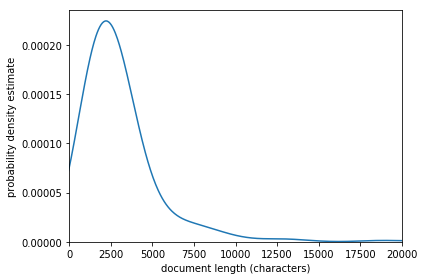

In [18]:
g = sns.kdeplot(data=articles["length"], gridsize=2000, legend=False)
g.set_xlabel('document length (characters)')
g.set_ylabel('probability density estimate')
g.set(xlim=(0, 20000))
plt.tight_layout()
plt.savefig(os.environ['FIGURES_PATH'] + "document_length_distribution.pdf", format="pdf")

In [16]:
articles.describe()

,length
count,1000.000000
mean,3265.890000
std,4158.137944
min,203.000000
25%,1588.000000
50%,2505.500000
75%,3632.000000
max,72065.000000
